# Project 1: Building a portfolio

### Q1 Choose any 10 risky assets from the market. These could be stocks, bonds, ETFs, or any other investable assets with readily available price data.

Selecte 10 risky assets are:

IRFC.NS: Indian Railway Finance Corporation Limited. 

GPIL.NS: Godawari Power and Ispat Limited.

HINDUNILVR.NS: Hindustan Unilever Limited. 

RBLBANK.NS: RBL Bank Limited. 

LICI.NS: Life Insurance Corporation of India.

ITC.NS: ITC Limited. 

WIPRO.NS: Wipro Limited. 

TATAELXSI.NS: Tata Elxsi Limited.

IOC.NS: Indian Oil Corporation Limited. 

RELIANCE.NS: Reliance Industries Limited. 

In [1]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt


In [2]:
ticker_symbols = ['IRFC.NS', 'GPIL.NS', 'HINDUNILVR.NS', 'RBLBANK.NS', 'LICI.NS', 'ITC.NS','WIPRO.NS','TATAELXSI.NS', 
                  'IOC.NS','RELIANCE.NS']

# Calculating the start and end dates for the past 3 months
end_date = datetime.now() - timedelta(days=1)
start_date = end_date - timedelta(days=90)  # 90 days ago

# Creating an empty DataFrame to store the closing prices
closing_prices_df = pd.DataFrame()

# Iterating over each ticker symbol and gather closing prices
for symbol in ticker_symbols:
    try:
        # Downloading historical data from Yahoo Finance
        data = yf.download(symbol, start=start_date, end=end_date)
        
        # Extracting the 'Close' prices and store them in the DataFrame
        closing_prices_df[symbol] = data['Close']
    except Exception as e:
        print(f"Failed to download data for {symbol}: {e}")

# closing prices DataFrame
print(closing_prices_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
               IRFC.NS     GPIL.NS  HINDUNILVR.NS  RBLBANK.NS      LICI.NS  \
Date                                                                         
2023-11-28   75.599998  659.950012    2510.550049  237.750000   674.299988   
2023-11-29   75.300003  652.299988    2525.050049  237.699997   680.900024  

## Sorting stocks based on mean return and picking only closing price of selected  stocks

### Q2. Gather the closing prices for your chosen assets over the past 3 months.

In [3]:
# Calculating relevant metrics for each stock
closing_prices_returns = closing_prices_df.pct_change()  # daily returns
mean_returns = closing_prices_returns.mean()  #  mean returns
volatility = closing_prices_returns.std()  #  volatility


metrics_df = pd.DataFrame({'Mean Return': mean_returns, 'Volatility': volatility})

# Sort stocks based on mean return (descending order)
selected_10_stocks = metrics_df.sort_values(by='Mean Return', ascending=False).head(10)

# Print the  10 stocks
print(" 10 Stocks Based on Mean Return:")
print(selected_10_stocks)

#ticker symbols of the 10 stocks
selected_10_symbols = selected_10_stocks.index.tolist()

# DataFrame to store the closing prices of the  10 stocks
selected_10_closing_prices_df = closing_prices_df[selected_10_symbols]



# closing prices of the 10 stocks
print("\nClosing Prices of the Top 10 Stocks:")
print(selected_10_closing_prices_df)

 10 Stocks Based on Mean Return:
               Mean Return  Volatility
IRFC.NS           0.013129    0.052693
IOC.NS            0.008508    0.027958
LICI.NS           0.008017    0.026789
WIPRO.NS          0.005224    0.020179
RELIANCE.NS       0.003789    0.014046
GPIL.NS           0.003058    0.023686
RBLBANK.NS        0.002334    0.024537
HINDUNILVR.NS    -0.000704    0.013147
ITC.NS           -0.000852    0.013243
TATAELXSI.NS     -0.000912    0.014895

Closing Prices of the Top 10 Stocks:
               IRFC.NS      IOC.NS      LICI.NS    WIPRO.NS  RELIANCE.NS  \
Date                                                                       
2023-11-28   75.599998  108.199997   674.299988  396.850006  2394.399902   
2023-11-29   75.300003  108.550003   680.900024  406.250000  2400.699951   
2023-11-30   74.650002  111.750000   679.500000  413.049988  2377.449951   
2023-12-01   75.400002  111.250000   670.900024  407.649994  2394.300049   
2023-12-04   76.400002  115.900002   719.000

### Q3.Calculate the simple/log returns for each asset over the chosen period.

In [4]:
# simple returns
simple_returns = {}
for asset, prices in selected_10_closing_prices_df.items():
    simple_returns[asset] = [(prices[i] - prices[i-1]) / prices[i-1] for i in range(1, len(prices))]

# log returns
log_returns = {}
for asset, prices in selected_10_closing_prices_df.items():
    log_returns[asset] = [np.log(prices[i] / prices[i-1]) for i in range(1, len(prices))]

# Converting the returns dictionaries into Pandas DataFrames
df_simple_returns = pd.DataFrame(simple_returns)
df_log_returns = pd.DataFrame(log_returns)

# Print the results
print("Simple Returns:")
print(df_simple_returns)

print("\nLog Returns:")
print(df_log_returns)

Simple Returns:
     IRFC.NS    IOC.NS   LICI.NS  WIPRO.NS  RELIANCE.NS   GPIL.NS  RBLBANK.NS  \
0  -0.003968  0.003235  0.009788  0.023687     0.002631 -0.011592   -0.000210   
1  -0.008632  0.029479 -0.002056  0.016738    -0.009685  0.052966   -0.013042   
2   0.010047 -0.004474 -0.012656 -0.013073     0.007087 -0.009463   -0.006394   
3   0.013263  0.041798  0.071695 -0.000491     0.010817  0.019843    0.040111   
4  -0.003272  0.015531 -0.006885 -0.007608     0.007251 -0.013908    0.017117   
5  -0.004596  0.013594  0.044745  0.035613     0.009579  0.006504    0.025953   
6   0.003298  0.017184  0.052882 -0.001194    -0.001646 -0.011835    0.012451   
7   0.007232 -0.021014 -0.016551  0.010400    -0.000529 -0.007935    0.045091   
8   0.073107 -0.010943 -0.001942 -0.004733     0.001466  0.022293    0.033620   
9   0.010341  0.000426  0.026980  0.003804    -0.014353 -0.005651   -0.010481   
10  0.005418  0.017865  0.016798 -0.006040     0.004084  0.007067    0.017166   
11  0.109581

### Q4.Apply Markowitz's mean-variance optimization to construct the efficient frontier.

In [5]:
log_returns_np = df_log_returns.values
# Convertting log returns to numpy array
log_returns_np = np.array([log_returns[asset] for asset in log_returns.keys()])

# Calculating mean returns and covariance matrix
mean_returns = np.mean(log_returns_np, axis=1)
cov_matrix = np.cov(log_returns_np)


weights = cp.Variable(len(mean_returns))


constraints = [
    cp.sum(weights) == 1,  # Sum of weights equals 1 (fully invested)
    weights >= 0           # Weights are non-negative
]

# objective function (minimize portfolio variance)
objective = cp.Minimize(cp.quad_form(weights, cov_matrix))

# Solving the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Get the optimal weights
optimal_weights = weights.value

# Calculating portfolio mean return and volatility
portfolio_mean_return = mean_returns.dot(optimal_weights)
portfolio_volatility = np.sqrt(optimal_weights.T.dot(cov_matrix).dot(optimal_weights))

# Print results
print("Optimal Weights:", optimal_weights)
print("Portfolio Mean Return:", portfolio_mean_return)
print("Portfolio Volatility:", portfolio_volatility)




Optimal Weights: [ 8.81634123e-20  1.31433324e-19  3.60965403e-02  3.38518655e-02
  2.39959610e-01  1.99472753e-02 -3.08700305e-20  2.13345252e-01
  2.03265046e-01  2.53534411e-01]
Portfolio Mean Return: 0.0007669347494067738
Portfolio Volatility: 0.008706433396823874


portfolio_volatility, portfolio_mean_return 0.008706433396823874 0.0007669347494067738


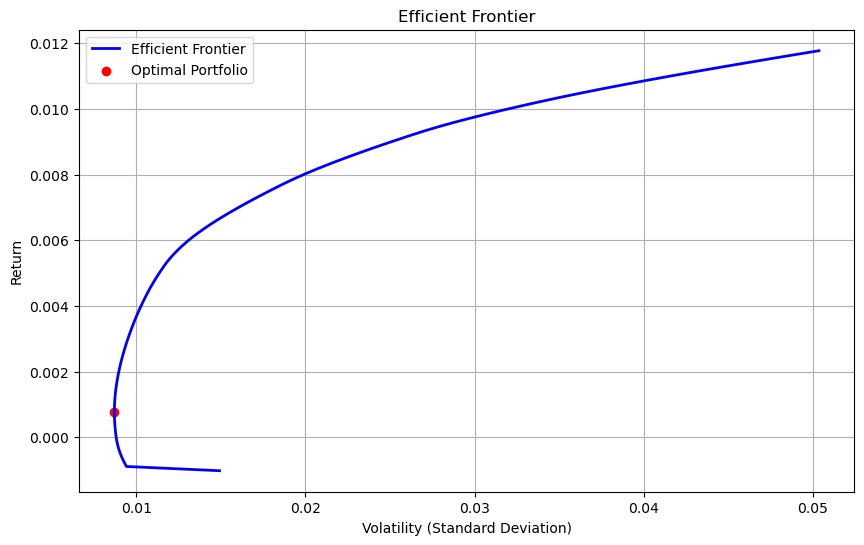

In [6]:
# Generating points on the efficient frontier
num_points = 100
min_return = min(mean_returns)
max_return = max(mean_returns)
target_returns = np.linspace(min_return, max_return, num_points)
efficient_frontier_volatility = []

for target_return in target_returns:
    # constraints for each target return
    constraints = [
        cp.sum(weights) == 1,
        weights >= 0,
        mean_returns @ weights == target_return
    ]

    # the objective function (minimize portfolio variance)
    objective = cp.Minimize(cp.quad_form(weights, cov_matrix))

    # Solve the optimization problem
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Checking if problem was solved successfully
    if problem.status != 'optimal':
        print("Optimization problem for target return {} did not converge to optimal solution.".format(target_return))
        efficient_frontier_volatility.append(None)  # Append None when optimization fails
        continue

    # Checking if weights have been obtained
    if weights.value is None:
        print("Optimal weights for target return {} could not be obtained.".format(target_return))
        efficient_frontier_volatility.append(None)  # Append None when weights could not be obtained
        continue

    # Calculating portfolio volatility for the current target return
    efficient_frontier_volatility.append(np.sqrt(weights.value.T.dot(cov_matrix).dot(weights.value)))

# Ploting the efficient frontier
print('portfolio_volatility, portfolio_mean_return',portfolio_volatility, portfolio_mean_return)
plt.figure(figsize=(10, 6))
# Removing None values from efficient_frontier_volatility and target_returns
efficient_frontier_volatility = [volatility for volatility in efficient_frontier_volatility if volatility is not None]
target_returns = target_returns[:len(efficient_frontier_volatility)]
plt.plot(efficient_frontier_volatility, target_returns, label='Efficient Frontier', color='blue', linewidth=2)
plt.scatter(portfolio_volatility, portfolio_mean_return, color='red', marker='o', label='Optimal Portfolio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Choose the minimum and maximum target returns
min_target_return = min(target_returns)
max_target_return = max(target_returns)

# Choose intermediate risk tolerance levels
num_levels = 5  # Adjust the number of levels as needed
risk_tolerance_levels = np.linspace(min_target_return, max_target_return, num_levels)

# Print the chosen risk tolerance levels
print("Chosen Risk Tolerance Levels:", risk_tolerance_levels)
for i in risk_tolerance_levels:
    if i>0:
        min_risk_tolerance_levels=i
        break
max_risk_tolerance_levels= max(risk_tolerance_levels)
print(min_risk_tolerance_levels, max_risk_tolerance_levels)

Chosen Risk Tolerance Levels: [-0.00102171  0.00217658  0.00537488  0.00857317  0.01177147]
0.002176580838965574 0.011771466239741617


### Q5 Choose two points on the efficient frontier representing two different risk tolerance levels. For each point, calculate the corresponding weights for each asset to construct a portfolio that maximizes expected return for that given level of risk.

portfolio_mean_return_risk_tolerance 0.0007874223465973105
portfolio_volatility_risk_tolerance 0.00967215964048926
portfolio_mean_return_risk_tolerance 0.005310263949656847
portfolio_volatility_risk_tolerance 0.015290868978992267


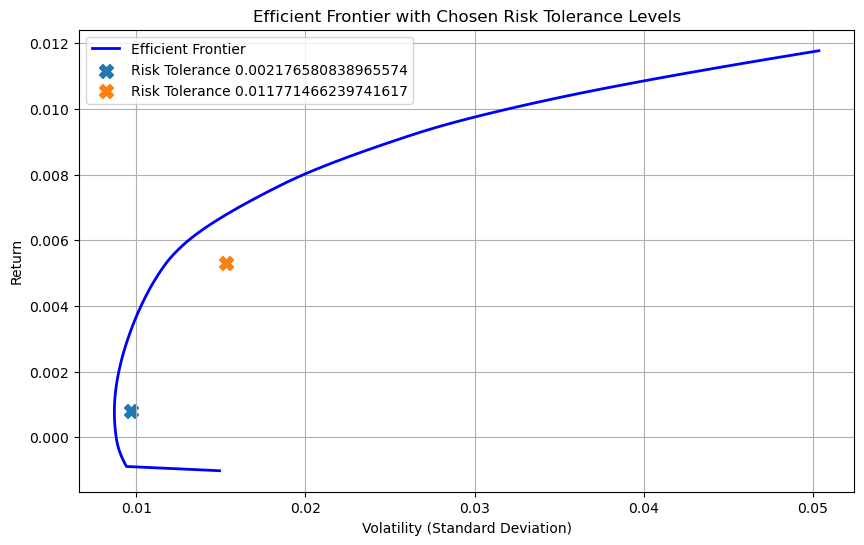

In [8]:
# Choose two risk tolerance levels
risk_tolerance_levels = [min_risk_tolerance_levels, max_risk_tolerance_levels]  

# Store the corresponding portfolios for each risk tolerance level
portfolios = {}

# Calculate the corresponding portfolios for each risk tolerance level
for risk_tolerance in risk_tolerance_levels:
    # Finding the closest point on the efficient frontier to the given risk tolerance level
    closest_index = np.argmin(np.abs(np.array(efficient_frontier_volatility) - risk_tolerance))
    
    
    # Get the target return corresponding to the closest volatility
    target_return = target_returns[closest_index]
    

    # Define the constraint for the given risk tolerance level
    constraints = [
        cp.sum(weights) == 1,
        weights >= 0,
        mean_returns @ weights == target_return
    ]

    # Define the objective function (maximize portfolio mean return)
    objective = cp.Maximize(mean_returns @ weights)

    # Solve the optimization problem
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.ECOS)

    # Get the optimal weights
    optimal_weights_risk_tolerance = weights.value
    # Calculating portfolio mean return and volatility
    portfolio_mean_return_risk_tolerance = mean_returns.dot(optimal_weights_risk_tolerance)
    portfolio_volatility_risk_tolerance = np.sqrt(optimal_weights_risk_tolerance.T.dot(cov_matrix).dot(optimal_weights_risk_tolerance))

    print('portfolio_mean_return_risk_tolerance',portfolio_mean_return_risk_tolerance)
    print('portfolio_volatility_risk_tolerance',portfolio_volatility_risk_tolerance)
    
    # Store the portfolio for this risk tolerance level
    portfolios[risk_tolerance] = {
        'weights': optimal_weights_risk_tolerance,
        'mean_return': portfolio_mean_return_risk_tolerance,
        'volatility': portfolio_volatility_risk_tolerance
    }

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(efficient_frontier_volatility, target_returns, label='Efficient Frontier', color='blue', linewidth=2)


for risk_tolerance, portfolio_info in portfolios.items():
    if risk_tolerance == 0.00191203:
        plt.scatter(portfolio_info['volatility'], portfolio_info['mean_return'], label=f'Risk Tolerance {risk_tolerance}', marker='o',s=100)
    else:
        plt.scatter(portfolio_info['volatility'], portfolio_info['mean_return'], label=f'Risk Tolerance {risk_tolerance}', marker='X',s=100)

  

plt.title('Efficient Frontier with Chosen Risk Tolerance Levels')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


### The optimal portfolio weights for each chosen point on the efficient frontier.

In [9]:
# Access and print the optimal portfolio weights for each chosen point
for risk_tolerance, portfolio_info in portfolios.items():
    print(f"Risk Tolerance: {risk_tolerance}")
    print("Optimal Portfolio Weights:")
    for asset, weight in zip(selected_10_symbols, portfolio_info['weights']):
        print(f"{asset}: {weight}")
    print()


Risk Tolerance: 0.002176580838965574
Optimal Portfolio Weights:
IRFC.NS: 0.021681629438484513
IOC.NS: 0.028461409256316718
LICI.NS: 0.02969035163556011
WIPRO.NS: 0.04097022287149961
RELIANCE.NS: 0.051571741441579576
GPIL.NS: 0.062289282772612094
RBLBANK.NS: 0.07431101699053505
HINDUNILVR.NS: 0.18668686046835484
ITC.NS: 0.21949259843472307
TATAELXSI.NS: 0.2848448866903345

Risk Tolerance: 0.011771466239741617
Optimal Portfolio Weights:
IRFC.NS: 0.17185793451068931
IOC.NS: 0.1369257385866167
LICI.NS: 0.132762216129138
WIPRO.NS: 0.10920144359361647
RELIANCE.NS: 0.09765702441966002
GPIL.NS: 0.08991215865041247
RBLBANK.NS: 0.08359774981836128
HINDUNILVR.NS: 0.06037416638014195
ITC.NS: 0.059186787821972085
TATAELXSI.NS: 0.05852478008939013



### Q6.Use the CAPM formula to calculate the expected return for each of your 10 risky assets.

Expected Returns for Each Asset using CAPM:
Asset 1 : 0.6274299999999999
Asset 2 : 0.24796799999999997
Asset 3 : 0.20574299999999998
Asset 4 : 0.49793999999999994
Asset 5 : 0.26851749999999996
Asset 6 : 0.20489849999999998
Asset 7 : 0.34874499999999997
Asset 8 : 0.1339605
Asset 9 : 0.33185499999999996
Asset 10 : 0.31215


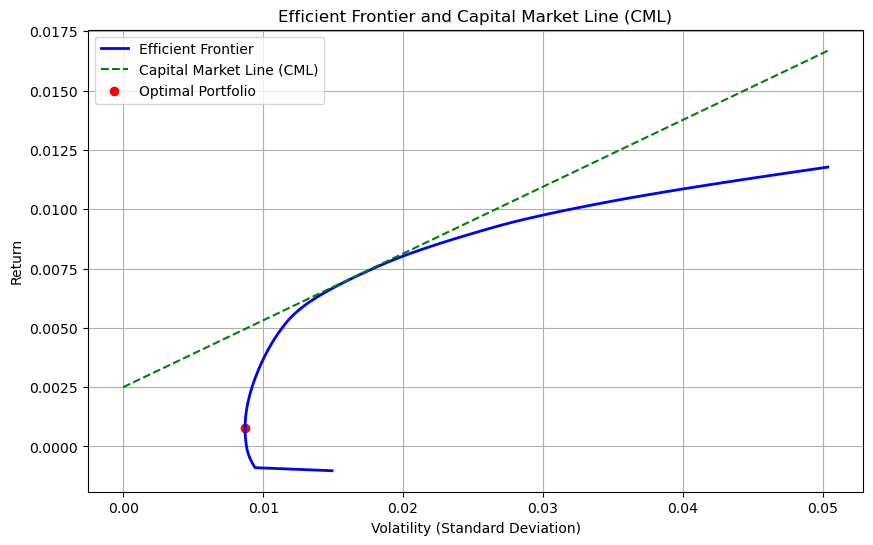

In [10]:

risk_free_rate = 0.0025
market_return = 0.284  

# Beta values for 10 assets
betas = [2.22,0.872,0.722,1.76,0.945,0.719,1.23,0.467,1.17,1.10]

# Calculating expected return for each asset using CAPM
expected_returns_CAPM = []
for beta in betas:
    expected_return = risk_free_rate + beta * (market_return - risk_free_rate)
    expected_returns_CAPM.append(expected_return)

# Print the results
print("Expected Returns for Each Asset using CAPM:")
for i in range(len(expected_returns_CAPM)):
    print("Asset", i+1, ":", expected_returns_CAPM[i])

# Plotting the efficient frontier and CML
plt.figure(figsize=(10, 6))
plt.plot(efficient_frontier_volatility, target_returns, label='Efficient Frontier', color='blue', linewidth=2)

# Plotting CML
x_values = np.linspace(0, max(efficient_frontier_volatility), 100)  # Range of volatilities
cml_y_values = risk_free_rate + (market_return - risk_free_rate) * x_values
plt.plot(x_values, cml_y_values, label='Capital Market Line (CML)', color='green', linestyle='--')

plt.scatter(portfolio_volatility, portfolio_mean_return, color='red', marker='o', label='Optimal Portfolio')
plt.title('Efficient Frontier and Capital Market Line (CML)')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

### Q7.Identify the tangency point on efficient frontier where CML touches it. Discuss what this point represents and its significance.

Tangency Point (Efficient Portfolio):
Volatility: 0.01647491650537903
Return: 0.007119400590880503


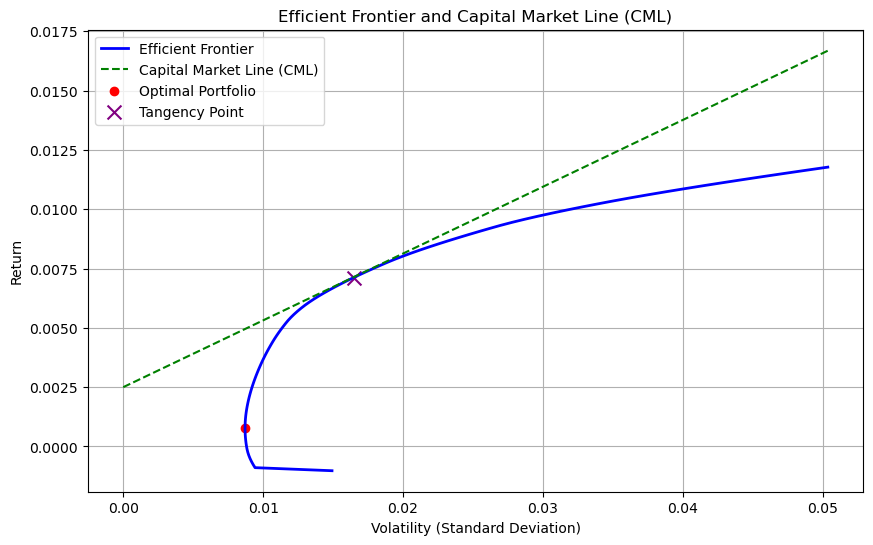

In [11]:
# Calculating Sharpe ratios for each portfolio on the efficient frontier
sharpe_ratios = (np.array(target_returns) - risk_free_rate) / np.array(efficient_frontier_volatility)

# Finding the index of the portfolio with the maximum Sharpe ratio
tangency_index = np.argmax(sharpe_ratios)

# Getting the tangency point's volatility and return
tangency_volatility = efficient_frontier_volatility[tangency_index]
tangency_return = target_returns[tangency_index]

# Print the tangency point
print("Tangency Point (Efficient Portfolio):")
print("Volatility:", tangency_volatility)
print("Return:", tangency_return)

# Plotting the tangency point on the efficient frontier and CML
plt.figure(figsize=(10, 6))
plt.plot(efficient_frontier_volatility, target_returns, label='Efficient Frontier', color='blue', linewidth=2)
plt.plot(x_values, cml_y_values, label='Capital Market Line (CML)', color='green', linestyle='--')
plt.scatter(portfolio_volatility, portfolio_mean_return, color='red', marker='o', label='Optimal Portfolio')
plt.scatter(tangency_volatility, tangency_return, color='purple', marker='x', s=100, label='Tangency Point')
plt.title('Efficient Frontier and Capital Market Line (CML)')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()



# The significance of the tangency point

The tangency point represents the optimal portfolio that an investor should choose based on the Capital Market Line (CML)
At this point, the portfolio achieves the highest possible Sharpe ratio, indicating the most efficient tradeoff between risk and return.
The portfolio's allocation balances risk-free assets (represented by the risk-free rate) and risky assets (represented by the market return) in an optimal manner.


### Q9. Choose 3 of your risky assets and calculate individual security market lines.

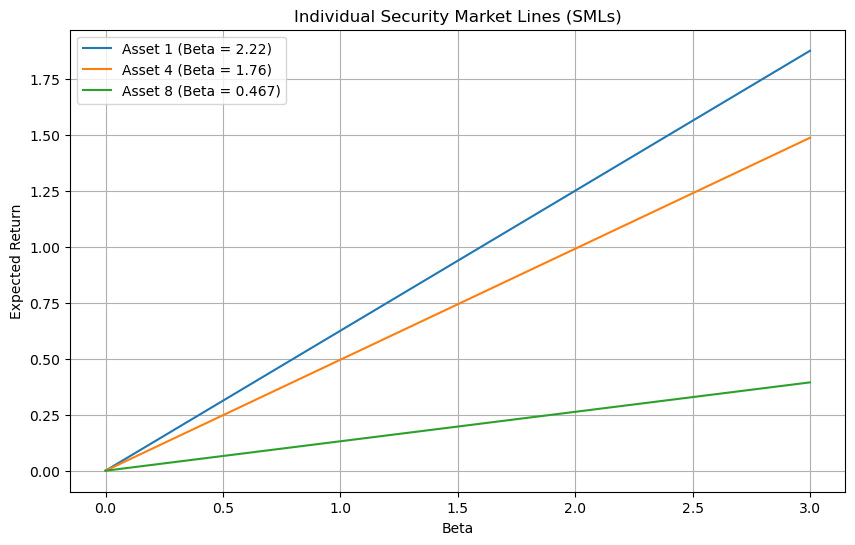

In [12]:
# Chosen risky assets and their betas
chosen_assets = [(1,2.22), (4,1.76), (8,0.467)]  # Asset index, Beta

# Plot Individual SMLs
plt.figure(figsize=(10, 6))

for asset_index, beta in chosen_assets:
    asset_betas = np.linspace(0, 3, 100)  # Range of betas for the asset
    asset_returns = risk_free_rate + beta * (asset_betas * (market_return - risk_free_rate))
    plt.plot(asset_betas, asset_returns, label=f'Asset {asset_index} (Beta = {beta})')

plt.title('Individual Security Market Lines (SMLs)')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()

### Q10.Calculate relevant performance measures (e.g., Sharpe Ratio, Treynor Ratio) for each of your optimized portfolios and compare them to individual assets. Discuss the implications of these measures in evaluating portfolio performance.

In [13]:
# Calculating Sharpe Ratio and Treynor Ratio for individual assets
# Calculating Sharpe Ratio for each portfolio
sharpe_ratios_portfolio = (np.array(target_returns) - risk_free_rate) / np.array(efficient_frontier_volatility)


sharpe_ratios_assets = (np.array(expected_returns_CAPM) - risk_free_rate) / np.array([np.std(log_returns_np[i]) for i in range(len(log_returns_np))])
treynor_ratios_assets = (np.array(expected_returns_CAPM) - risk_free_rate) / np.array(betas)

# Print performance measures for each portfolio and individual assets
print("\nPerformance Measures:")
print("Portfolio\t\tSharpe Ratio")
for i in range(len(target_returns)):
    print(f"Portfolio {i+1}\t\t{sharpe_ratios_portfolio[i]:.4f}\t\t")

print("\nIndividual Assets\tSharpe Ratio\tTreynor Ratio")
for i in range(len(expected_returns_CAPM)):
    print(f"Asset {i+1}\t\t{sharpe_ratios_assets[i]:.4f}\t\t{treynor_ratios_assets[i]:.4f}")


Performance Measures:
Portfolio		Sharpe Ratio
Portfolio 1		-0.2360		
Portfolio 2		-0.3601		
Portfolio 3		-0.3514		
Portfolio 4		-0.3419		
Portfolio 5		-0.3316		
Portfolio 6		-0.3204		
Portfolio 7		-0.3084		
Portfolio 8		-0.2957		
Portfolio 9		-0.2824		
Portfolio 10		-0.2687		
Portfolio 11		-0.2548		
Portfolio 12		-0.2406		
Portfolio 13		-0.2261		
Portfolio 14		-0.2115		
Portfolio 15		-0.1967		
Portfolio 16		-0.1818		
Portfolio 17		-0.1667		
Portfolio 18		-0.1517		
Portfolio 19		-0.1365		
Portfolio 20		-0.1214		
Portfolio 21		-0.1063		
Portfolio 22		-0.0912		
Portfolio 23		-0.0763		
Portfolio 24		-0.0614		
Portfolio 25		-0.0467		
Portfolio 26		-0.0321		
Portfolio 27		-0.0177		
Portfolio 28		-0.0036		
Portfolio 29		0.0104		
Portfolio 30		0.0242		
Portfolio 31		0.0377		
Portfolio 32		0.0510		
Portfolio 33		0.0640		
Portfolio 34		0.0768		
Portfolio 35		0.0893		
Portfolio 36		0.1015		
Portfolio 37		0.1134		
Portfolio 38		0.1250		
Portfolio 39		0.1363		
Portfolio 40		0.1474		
Portfolio 41		